### Spam and Ham_assignment1


In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
spam_emails = []
directory = '.\spam_2'
for filename in os.listdir(directory):
    if filename in ['.ipynb_checkpoints','cmds']:
        continue
    file_path = os.path.join(directory, filename)
    with open(file_path, 'r') as f: 
        try:
            lines = f.readlines()
            corpurs = ''
            i=0
            for line in lines:
                if line == '\n':
                    break
                i+=1
            for line in lines[i:]:
                corpurs += line
            spam_emails.append(corpurs)
        except:
            continue

In [3]:
ham_emails = []
directory = '.\easy_ham_2'
for filename in os.listdir(directory):
    if filename in ['.ipynb_checkpoints','cmds']:
        continue
    file_path = os.path.join(directory, filename)
    with open(file_path, 'r') as f: 
        try:
            lines = f.readlines()
            corpurs = ''
            i=0
            for line in lines:
                if line == '\n':
                    break
                i+=1
            for line in lines[i:]:
                corpurs += line
            ham_emails.append(corpurs)
        except:
            continue

In [4]:
label_spam = 1
label_ham = 0
df_spam_emails = pd.DataFrame({'email':spam_emails,
                          'label':[label_spam]*len(spam_emails)})
df_ham_emails = pd.DataFrame({'email':ham_emails,
                          'label':[label_ham]*len(ham_emails)})
df_emails = pd.concat([df_spam_emails, df_ham_emails], axis=0).reset_index(drop=True)

In [5]:
df_emails = shuffle(df_emails).reset_index(drop=True)
df_emails

,email,label
0,\n--0-1561587743-1028562700=:5319\nContent-Typ...,1
1,"\nConor Wynne wrote:\n\n>Dunno Tim, but I'm se...",0
2,"\nSorry, gang, but I've flipped the switch. If...",0
3,"\nMornin' all,\n\tLast night, i was involved i...",0
4,\nPerhaps it's time to revisit ...\n\nhttp://w...,0
...,...,...
2788,"\n<HTML>\n <HEAD>\n <style type=""text/cs...",1
2789,\nWE NEED HELP. We are a 14 year old fortune ...,1
2790,"\n<div align=""center""><center>\n\n<table borde...",1
2791,"\nThanks for this, Matthias! Hope you feel be...",0


In [6]:
df_emails['label'].value_counts()

0    1400
1    1393
Name: label, dtype: int64

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\89807\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\89807\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\89807\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
import string
stop = stopwords.words('english')
StopWords = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def useless(token):
    return  token not in StopWords and token not in list(string.punctuation)  and len(token)>2    
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    clean_text = [wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if useless(word)]
    clean_text2 = [word for word in clean_text if useless(word)]
    return " ".join(clean_text2)
df_emails['email'] = df_emails['email'].apply(clean_txt)
df_emails_cleaned = df_emails

In [9]:
df_emails_cleaned

,email,label
0,0-1561587743-1028562700=:5319 content-type tex...,1
1,conor wynne write dunno tim seriously consider...,0
2,sorry gang 've flip switch post address n't ma...,0
3,mornin last night involve epic struggle write ...,0
4,perhaps time revisit ... http //www.engrish.co...,0
...,...,...
2788,html head style type= text/css body font-size ...,1
2789,need help year old fortune 500 company grow 10...,1
2790,div align= center center table border= width= ...,1
2791,thank matthias hope feel better lance tue 2002...,0


In [10]:
all_words = ""
for s in df_emails_cleaned['email']:
    all_words = all_words+" "+s 
    
common_words = Counter(all_words.split()).most_common()
print(common_words[:50])

[('font', 16281), ('/font', 15915), ('http', 11015), ('nbsp', 9734), ('/td', 7796), ('arial', 5528), ('/tr', 4670), ('face=', 4409), ('color=3d', 3667), ('center', 3621), ('width=3d', 3567), ('color=', 3469), ('helvetica', 3275), ('email', 3159), ('size=', 3154), ('list', 2998), ('=20', 2930), ('face=3d', 2829), ('size=3d', 2822), ('verdana', 2799), ('width=', 2709), ('get', 2686), ("n't", 2611), ('use', 2480), ('sans-serif', 2471), ('mail', 2312), ('ffffff', 2287), ('img', 2268), ('href=', 2237), ('free', 2149), ('one', 2137), ('align=3d', 2115), ('table', 2114), ('time', 2083), ('make', 2045), ('align=', 1974), ('/table', 1946), ('...', 1935), ('new', 1866), ('information', 1841), ('000000', 1758), ('click', 1747), ('send', 1689), ('work', 1666), ('href=3d', 1647), ('div', 1609), ('receive', 1597), ('/div', 1596), ('address', 1570), ('please', 1548)]


In [11]:
n_all_words = len(common_words)
add_stop_words = [word for word, count in common_words if count > 1000]
StopWords = set(stopwords.words('english')).union(add_stop_words)
df_emails_cleaned['email'] = df_emails_cleaned['email'].apply(clean_txt)
df_emails_final = df_emails_cleaned
df_emails_final

,email,label
0,0-1561587743-1028562700=:5319 content-type tex...,1
1,conor wynne dunno tim seriously consider buy o...,0
2,sorry gang 've flip switch post match subscrip...,0
3,mornin last night involve epic struggle shell ...,0
4,perhaps revisit //www.engrish.com/recentdiscov...,0
...,...,...
2788,head style type= text/css font-size 12px font-...,1
2789,help year old fortune 500 grow 1000 keep look ...,1
2790,//www.rootssearch.net //www.rootssearch.net/rs...,1
2791,thank matthias hope feel better lance tue 2002...,0


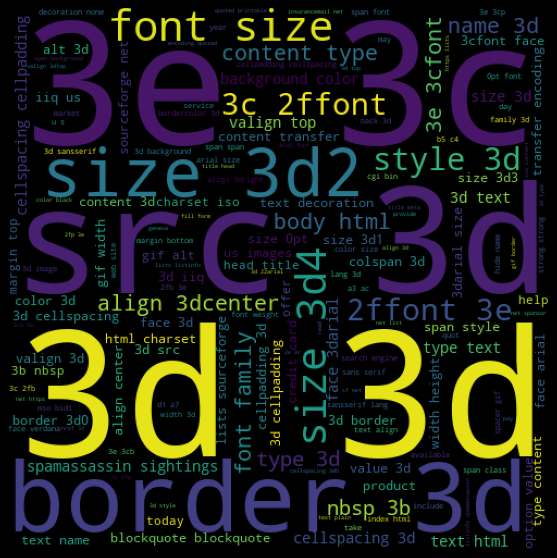

In [12]:
spam_corpus = ' '.join(list(df_emails_final[df_emails_final['label'] == 1]['email']))
spam_wc = WordCloud(width = 500,height = 500).generate(spam_corpus)
plt.figure(figsize = (10, 10), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

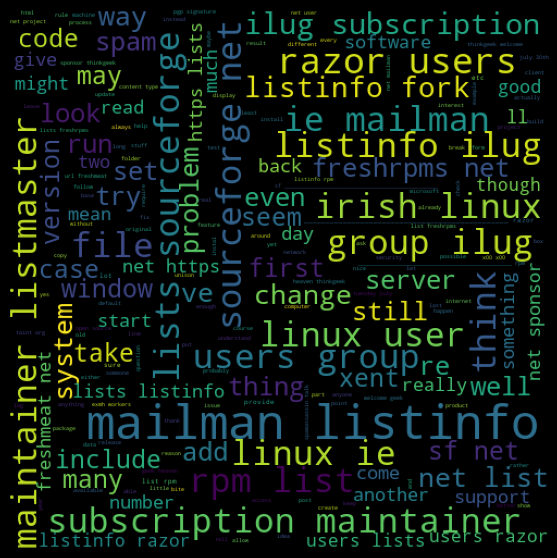

In [13]:
ham_corpus = ' '.join(list(df_emails_final[df_emails_final['label'] == 0]['email']))
ham_wc = WordCloud(width = 500,height = 500).generate(ham_corpus)
plt.figure(figsize = (10, 10), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

## model

In [14]:
X = df_emails_final.iloc[:,:-1]
y = df_emails_final.iloc[:,-1]
X

,email
0,0-1561587743-1028562700=:5319 content-type tex...
1,conor wynne dunno tim seriously consider buy o...
2,sorry gang 've flip switch post match subscrip...
3,mornin last night involve epic struggle shell ...
4,perhaps revisit //www.engrish.com/recentdiscov...
...,...
2788,head style type= text/css font-size 12px font-...
2789,help year old fortune 500 grow 1000 keep look ...
2790,//www.rootssearch.net //www.rootssearch.net/rs...
2791,thank matthias hope feel better lance tue 2002...


In [15]:
y

0       1
1       0
2       0
3       0
4       0
       ..
2788    1
2789    1
2790    1
2791    0
2792    0
Name: label, Length: 2793, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
vectorizer = TfidfVectorizer()
X_train_matrix = vectorizer.fit_transform(X_train['email'])
emails_tfidf_df = pd.DataFrame(X_train_matrix.toarray())
emails_tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,43140,43141,43142,43143,43144,43145,43146,43147,43148,43149
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.018556,0.037678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1951,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1952,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1953,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
print(emails_tfidf_df.shape)

(1955, 43150)


In [18]:
svm_model = svm.SVC(C=1000, random_state=42)
svm_model.fit(X_train_matrix, y_train)

SVC(C=1000, random_state=42)

accuracy 0.99


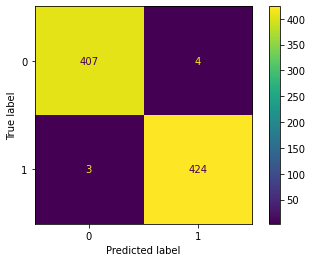

In [19]:
X_test_matrix = vectorizer.transform(X_test['email'])
y_pred = svm_model.predict(X_test_matrix)
plot_confusion_matrix(svm_model, X_test_matrix, y_test) 
cf_matrix = confusion_matrix(y_test, y_pred)
accuracy  = np.round(np.trace(cf_matrix) / float(np.sum(cf_matrix)), 2)
print('accuracy', accuracy)